In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
directory = 'calib_data_hr/'

hdul = fits.open(directory+'d2035.fits')
data_bias_1=hdul[0].data

hdul = fits.open(directory+'d2036.fits')
data_bias_2=hdul[0].data

hdul = fits.open(directory+'d2037.fits')
data_bias_3=hdul[0].data

hdul = fits.open(directory+'d2038.fits')
data_bias_4=hdul[0].data



In [3]:
data_bias_1 = data_bias_1.astype(float)
data_bias_2 = data_bias_1.astype(float)
data_bias_3 = data_bias_1.astype(float)
data_bias_4 = data_bias_1.astype(float)

In [4]:
temp_array= np.zeros(shape=(1024,1056,4))
temp_array[:,:,0]= data_bias_1
temp_array[:,:,1]= data_bias_2
temp_array[:,:,2]= data_bias_3
temp_array[:,:,3]= data_bias_4
#temp_array[:,:,4]= data_dark_5
bias_median = np.median(temp_array,axis=2)



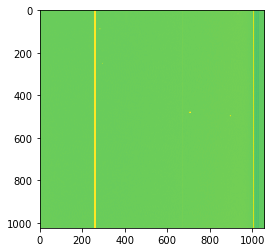

In [5]:
plt.imshow(bias_median,vmin=500,vmax=1200)


In [6]:
hdul = fits.open(directory+'d2039.fits') # 20 secs
data_dark_1=hdul[0].data

hdul = fits.open(directory+'d2040.fits') # 20 secs
data_dark_2=hdul[0].data

hdul = fits.open(directory+'d2041.fits') # 20 secs
data_dark_3=hdul[0].data

hdul = fits.open(directory+'d2042.fits') # 20 secs
data_dark_4=hdul[0].data

hdul = fits.open(directory+'d2043.fits') # 20 secs
data_dark_5=hdul[0].data


data_dark_1= (data_dark_1-bias_median)/20.0
data_dark_2= (data_dark_2-bias_median)/20.0
data_dark_3= (data_dark_3-bias_median)/20.0
data_dark_4= (data_dark_4-bias_median)/20.0
data_dark_5= (data_dark_5-bias_median)/20.0


temp_array= np.zeros(shape=(1024,1056,5))
temp_array[:,:,0]= data_dark_1
temp_array[:,:,1]= data_dark_2
temp_array[:,:,2]= data_dark_3
temp_array[:,:,3]= data_dark_4
temp_array[:,:,4]= data_dark_5
dark_median = np.median(temp_array,axis=2)

In [7]:
hdu = fits.PrimaryHDU(dark_median)
hdul = fits.HDUList([hdu])
hdul.writeto('dark_per_sec.fits',overwrite=True)

In [8]:
hdu = fits.PrimaryHDU(bias_median)
hdul = fits.HDUList([hdu])
hdul.writeto('bias.fits',overwrite=True)

# Now first work with dome flats in the B band

In [9]:
hdul = fits.open(directory+'d2044.fits') # 30 secs
data_sflat_1=hdul[0].data

hdul = fits.open(directory+'d2045.fits') # 30 secs
data_sflat_2=hdul[0].data

hdul = fits.open(directory+'d2046.fits') # 30 secs
data_sflat_3=hdul[0].data

hdul = fits.open(directory+'d2047.fits') # 30 secs
data_sflat_4=hdul[0].data

hdul = fits.open(directory+'d2048.fits') # 30 secs
data_sflat_5=hdul[0].data

# normalize flats to 1 sec

data_sflat_1= (data_sflat_1-bias_median)/30.0
data_sflat_2= (data_sflat_2-bias_median)/30.0
data_sflat_3= (data_sflat_3-bias_median)/30.0
data_sflat_4= (data_sflat_4-bias_median)/30.0
data_sflat_5= (data_sflat_5-bias_median)/30.0

data_sflat_1 = data_sflat_1 - dark_median
data_sflat_2 = data_sflat_2 - dark_median
data_sflat_3 = data_sflat_3 - dark_median
data_sflat_4 = data_sflat_4 - dark_median
data_sflat_5 = data_sflat_5 - dark_median


data_sflat_1= data_sflat_1/np.median(data_sflat_1.flatten())
data_sflat_2= data_sflat_2/np.median(data_sflat_2.flatten())
data_sflat_3= data_sflat_3/np.median(data_sflat_3.flatten())
data_sflat_4= data_sflat_4/np.median(data_sflat_4.flatten())
data_sflat_5= data_sflat_5/np.median(data_sflat_5.flatten())


In [10]:
temp_array= np.zeros(shape=(1024,1056,5))
temp_array[:,:,0]= data_sflat_1
temp_array[:,:,1]= data_sflat_2
temp_array[:,:,2]= data_sflat_3
temp_array[:,:,3]= data_sflat_4
temp_array[:,:,4]= data_sflat_5
flat_median_B = np.median(temp_array,axis=2)



In [11]:
hdu = fits.PrimaryHDU(flat_median_B)
hdul = fits.HDUList([hdu])
hdul.writeto('flat_B_per_sec.fits',overwrite=True)

# Now first work with dome flats in the V band

In [12]:
hdul = fits.open(directory+'d2049.fits') # 10 secs
data_sflat_1=hdul[0].data

hdul = fits.open(directory+'d2050.fits') # 10 secs
data_sflat_2=hdul[0].data

hdul = fits.open(directory+'d2051.fits') # 10 secs
data_sflat_3=hdul[0].data

hdul = fits.open(directory+'d2052.fits') # 10 secs
data_sflat_4=hdul[0].data

hdul = fits.open(directory+'d2053.fits') # 10 secs
data_sflat_5=hdul[0].data

# normalize flats to 1 sec

data_sflat_1= (data_sflat_1-bias_median)/10.0
data_sflat_2= (data_sflat_2-bias_median)/10.0
data_sflat_3= (data_sflat_3-bias_median)/10.0
data_sflat_4= (data_sflat_4-bias_median)/10.0
data_sflat_5= (data_sflat_5-bias_median)/10.0

data_sflat_1 = data_sflat_1 - dark_median
data_sflat_2 = data_sflat_2 - dark_median
data_sflat_3 = data_sflat_3 - dark_median
data_sflat_4 = data_sflat_4 - dark_median
data_sflat_5 = data_sflat_5 - dark_median


data_sflat_1= data_sflat_1/np.median(data_sflat_1.flatten())
data_sflat_2= data_sflat_2/np.median(data_sflat_2.flatten())
data_sflat_3= data_sflat_3/np.median(data_sflat_3.flatten())
data_sflat_4= data_sflat_4/np.median(data_sflat_4.flatten())
data_sflat_5= data_sflat_5/np.median(data_sflat_5.flatten())


In [13]:
temp_array= np.zeros(shape=(1024,1056,5))
temp_array[:,:,0]= data_sflat_1
temp_array[:,:,1]= data_sflat_2
temp_array[:,:,2]= data_sflat_3
temp_array[:,:,3]= data_sflat_4
temp_array[:,:,4]= data_sflat_5
flat_median_V = np.median(temp_array,axis=2)



In [14]:
hdu = fits.PrimaryHDU(flat_median_V)
hdul = fits.HDUList([hdu])
hdul.writeto('flat_V_per_sec.fits',overwrite=True)

Need to run the cells above these only once in total

# Reducing Landolt Fields in B

In [15]:
directory_sc = 'science_data_hr/'

hdul = fits.open(directory_sc+'d2112.fits') # 4 secs
data_science_1=hdul[0].data


hdul = fits.open(directory_sc+'d2113.fits') # 20 secs
data_science_2=hdul[0].data


hdul = fits.open(directory_sc+'d2114.fits') # 20 secs
data_science_3=hdul[0].data


hdul = fits.open(directory_sc+'d2115.fits') # 20 secs
data_science_4=hdul[0].data


hdul = fits.open(directory_sc+'d2116.fits') # 20 secs
data_science_5=hdul[0].data


data_science_1= (data_science_1-bias_median)/4.0
data_science_2= (data_science_2-bias_median)/20.0
data_science_3= (data_science_3-bias_median)/20.0
data_science_4= (data_science_4-bias_median)/20.0
data_science_5= (data_science_5-bias_median)/20.0

In [16]:
temp_array= np.zeros(shape=(1024,1056,5))
temp_array[:,:,0]= data_science_1
temp_array[:,:,1]= data_science_2
temp_array[:,:,2]= data_science_3
temp_array[:,:,3]= data_science_4
temp_array[:,:,4]= data_science_5
science_median = np.median(temp_array,axis=2)



In [17]:
hdul = fits.open('dark_per_sec.fits') # 30 secs
dark_median=hdul[0].data

hdul = fits.open('flat_B_per_sec.fits') # 30 secs
flat_median_B=hdul[0].data

final_image = (science_median-dark_median)/(flat_median_B)

<ipython-input-17-0c23a72b226a>:7: RuntimeWarning: divide by zero encountered in true_divide
  final_image = (science_median-dark_median)/(flat_median_B)
<ipython-input-17-0c23a72b226a>:7: RuntimeWarning: invalid value encountered in true_divide
  final_image = (science_median-dark_median)/(flat_median_B)


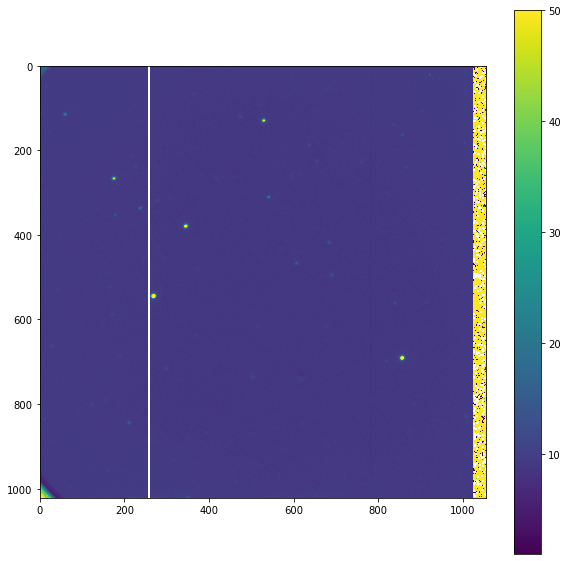

In [27]:
plt.figure(figsize=(10,10))
im=plt.imshow(final_image,vmin=1,vmax=50)
plt.colorbar(im)

In [28]:
hdu = fits.PrimaryHDU(final_image)
hdul = fits.HDUList([hdu])
hdul.writeto('landolt_B_per_sec.fits',overwrite=True)

# Reducing Landolt Fields in V

In [30]:
directory_sc = 'science_data_hr/'

hdul = fits.open(directory_sc+'d2128.fits') # 4 secs
data_science_1=hdul[0].data


hdul = fits.open(directory_sc+'d2129.fits') # 20 secs
data_science_2=hdul[0].data


hdul = fits.open(directory_sc+'d2130.fits') # 20 secs
data_science_3=hdul[0].data


hdul = fits.open(directory_sc+'d2131.fits') # 20 secs
data_science_4=hdul[0].data




data_science_1= (data_science_1-bias_median)/4.0
data_science_2= (data_science_2-bias_median)/20.0
data_science_3= (data_science_3-bias_median)/20.0
data_science_4= (data_science_4-bias_median)/20.0

temp_array= np.zeros(shape=(1024,1056,4))
temp_array[:,:,0]= data_science_1
temp_array[:,:,1]= data_science_2
temp_array[:,:,2]= data_science_3
temp_array[:,:,3]= data_science_4

science_median = np.median(temp_array,axis=2)



In [31]:
hdul = fits.open('dark_per_sec.fits') # 30 secs
dark_median=hdul[0].data

hdul = fits.open('flat_V_per_sec.fits') # 30 secs
flat_median_V=hdul[0].data

final_image = (science_median-dark_median)/(flat_median_V)

<ipython-input-31-31a625e5167d>:7: RuntimeWarning: divide by zero encountered in true_divide
  final_image = (science_median-dark_median)/(flat_median_V)
<ipython-input-31-31a625e5167d>:7: RuntimeWarning: invalid value encountered in true_divide
  final_image = (science_median-dark_median)/(flat_median_V)


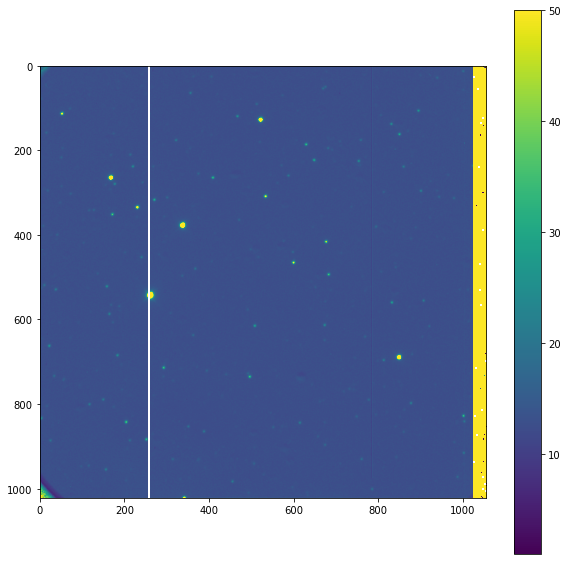

In [32]:
plt.figure(figsize=(10,10))
im=plt.imshow(final_image,vmin=1,vmax=50)
plt.colorbar(im)

In [33]:
hdu = fits.PrimaryHDU(final_image)
hdul = fits.HDUList([hdu])
hdul.writeto('landolt_V_per_sec.fits',overwrite=True)

# Science Field in B 

In [34]:
directory_sc = 'science_data_hr/'

hdul = fits.open(directory_sc+'d2117.fits') # 4 secs
data_science_1=hdul[0].data


hdul = fits.open(directory_sc+'d2118.fits') # 20 secs
data_science_2=hdul[0].data


hdul = fits.open(directory_sc+'d2119.fits') # 20 secs
data_science_3=hdul[0].data


hdul = fits.open(directory_sc+'d2120.fits') # 20 secs
data_science_4=hdul[0].data

hdul = fits.open(directory_sc+'d2121.fits') # 20 secs
data_science_5=hdul[0].data




data_science_1= (data_science_1-bias_median)/4.0
data_science_2= (data_science_2-bias_median)/20.0
data_science_3= (data_science_3-bias_median)/20.0
data_science_4= (data_science_4-bias_median)/20.0
data_science_5= (data_science_5-bias_median)/20.0

temp_array= np.zeros(shape=(1024,1056,5))
temp_array[:,:,0]= data_science_1
temp_array[:,:,1]= data_science_2
temp_array[:,:,2]= data_science_3
temp_array[:,:,3]= data_science_4
temp_array[:,:,4]= data_science_5



science_median = np.median(temp_array,axis=2)

In [35]:
hdul = fits.open('dark_per_sec.fits') # 30 secs
dark_median=hdul[0].data

hdul = fits.open('flat_B_per_sec.fits') # 30 secs
flat_median_B=hdul[0].data

final_image = (science_median-dark_median)/(flat_median_B)

<ipython-input-35-0c23a72b226a>:7: RuntimeWarning: divide by zero encountered in true_divide
  final_image = (science_median-dark_median)/(flat_median_B)
<ipython-input-35-0c23a72b226a>:7: RuntimeWarning: invalid value encountered in true_divide
  final_image = (science_median-dark_median)/(flat_median_B)


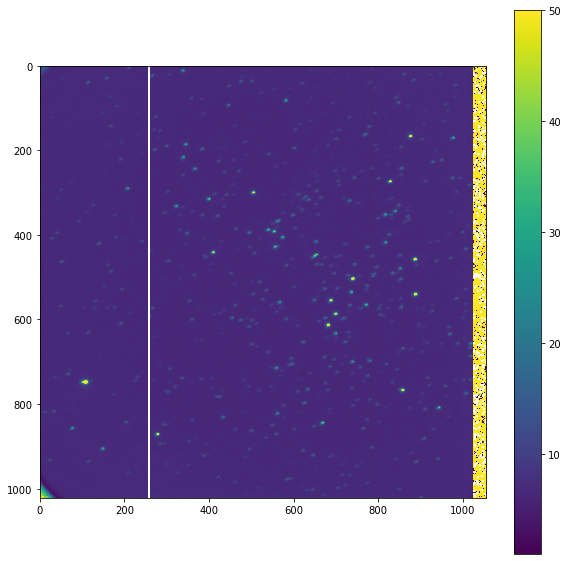

In [36]:
plt.figure(figsize=(10,10))
im=plt.imshow(final_image,vmin=1,vmax=50)
plt.colorbar(im)

In [37]:
hdu = fits.PrimaryHDU(final_image)
hdul = fits.HDUList([hdu])

hdul.writeto('cluster_B_per_sec.fits',overwrite=True)

# Science Field in V

In [39]:
directory_sc = 'science_data_hr/'

hdul = fits.open(directory_sc+'d2124.fits') # 20 secs
data_science_1=hdul[0].data


hdul = fits.open(directory_sc+'d2125.fits') # 20 secs
data_science_2=hdul[0].data


hdul = fits.open(directory_sc+'d2126.fits') # 20 secs
data_science_3=hdul[0].data


hdul = fits.open(directory_sc+'d2127.fits') # 20 secs
data_science_4=hdul[0].data





data_science_1= (data_science_1-bias_median)/20.0
data_science_2= (data_science_2-bias_median)/20.0
data_science_3= (data_science_3-bias_median)/20.0
data_science_4= (data_science_4-bias_median)/20.0

temp_array= np.zeros(shape=(1024,1056,4))
temp_array[:,:,0]= data_science_1
temp_array[:,:,1]= data_science_2
temp_array[:,:,2]= data_science_3
temp_array[:,:,3]= data_science_4



science_median = np.median(temp_array,axis=2)

In [40]:
hdul = fits.open('dark_per_sec.fits') # 30 secs
dark_median=hdul[0].data

hdul = fits.open('flat_V_per_sec.fits') # 30 secs
flat_median_V=hdul[0].data

final_image = (science_median-dark_median)/(flat_median_V)

<ipython-input-40-31a625e5167d>:7: RuntimeWarning: divide by zero encountered in true_divide
  final_image = (science_median-dark_median)/(flat_median_V)
<ipython-input-40-31a625e5167d>:7: RuntimeWarning: invalid value encountered in true_divide
  final_image = (science_median-dark_median)/(flat_median_V)


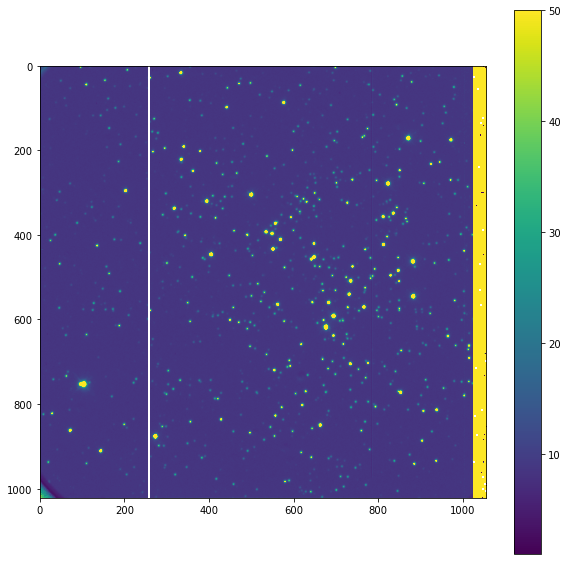

In [41]:
plt.figure(figsize=(10,10))
im=plt.imshow(final_image,vmin=1,vmax=50)
plt.colorbar(im)

In [42]:
hdu = fits.PrimaryHDU(final_image)
hdul = fits.HDUList([hdu])

hdul.writeto('cluster_V_per_sec.fits',overwrite=True)